In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from Bio.Seq import Seq

# Dataset insights: Complete dataset

In [3]:
df_dataset = pd.read_csv("../data/dataset/final.csv")

## Number of parent child pairs

In [4]:
df_dataset.count()

parent    9199
child     9199
dtype: int64

## Nucleotide distribution

In [5]:
def count_nucleotide(seq, nucleotide):
    return seq.count(nucleotide)

In [6]:
df_nucleotide_distribution = df_dataset.copy()

df_nucleotide_distribution["count_A"] = df_nucleotide_distribution.apply(lambda row: count_nucleotide(row["parent"], "A"), axis=1)
df_nucleotide_distribution["count_T"] = df_nucleotide_distribution.apply(lambda row: count_nucleotide(row["parent"], "T"), axis=1)
df_nucleotide_distribution["count_G"] = df_nucleotide_distribution.apply(lambda row: count_nucleotide(row["parent"], "G"), axis=1)
df_nucleotide_distribution["count_C"] = df_nucleotide_distribution.apply(lambda row: count_nucleotide(row["parent"], "C"), axis=1)
df_nucleotide_distribution["count_N"] = df_nucleotide_distribution.apply(lambda row: count_nucleotide(row["parent"], "N"), axis=1)
df_nucleotide_distribution["count_-"] = df_nucleotide_distribution.apply(lambda row: count_nucleotide(row["parent"], "-"), axis=1)

print(df_nucleotide_distribution.columns)

Index(['parent', 'child', 'count_A', 'count_T', 'count_G', 'count_C',
       'count_N', 'count_-'],
      dtype='object')


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 4.000e+00, 0.000e+00, 4.000e+00, 5.000e+00,
        3.000e+00, 3.000e+00, 1.000e+00, 4.000e+00, 1.300e+01, 1.300e+01,
        2.100e+01, 1.700e+01, 4.000e+0

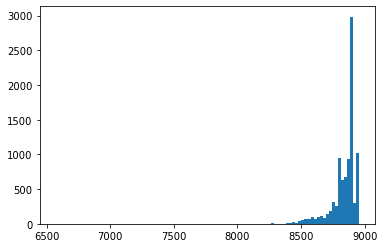

In [7]:
plt.hist(df_nucleotide_distribution["count_A"], bins=100)
#TODO: nice plots of nucleotide distibution

## Differences between parent child sequences

In [8]:
def equal_columns(df_dataset):
    comparison_column = np.where(df_dataset["parent"] == df_dataset["child"], True, False)
    print("From {} parent child pairs {} pairs are completely equal".format(df_dataset["parent"].count(), comparison_column.sum()))

equal_columns(df_dataset)

From 9199 parent child pairs 396 pairs are completely equal


In [9]:
def count_string_differences(seq1, seq2):
    count = sum(1 for a, b in zip(seq1, seq2) if a != b)
    return count

In [10]:
df_dataset["count_different_nucleotides"] = df_dataset.apply(lambda row: count_string_differences(row["parent"], row["child"]), axis=1)

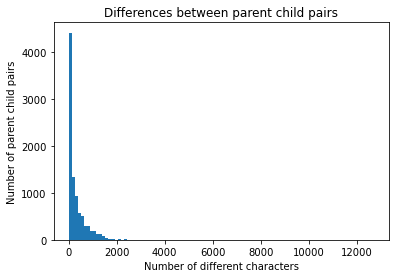

In [11]:
plt.hist(df_dataset["count_different_nucleotides"], bins=100)
plt.xlabel('Number of different characters')
plt.ylabel('Number of parent child pairs')
plt.title('Differences between parent child pairs')
plt.savefig('distributionDifferencesParentChild.png')
plt.show()

## Which genetic loci are often mutated?

In [12]:
def boolean_mask_of_differences(parent, child):
    # mutation = difference -> True
    return np.array(list(parent)) != np.array(list(child))

In [13]:
df_mutation_locis = df_dataset.copy()
df_mutation_locis["mutation_positions"] = df_mutation_locis.apply(lambda row: boolean_mask_of_differences(row["parent"], row["child"]), axis=1)

In [14]:
mutation_positions_matrix = df_mutation_locis["mutation_positions"].to_numpy()

print(mutation_positions_matrix)
print(mutation_positions_matrix.shape)
number_mutations = sum(mutation_positions_matrix)
print(sum(mutation_positions_matrix))
print(len(sum(mutation_positions_matrix)))

[array([False, False, False, ...,  True,  True, False])
 array([False, False, False, ...,  True,  True, False])
 array([False, False, False, ...,  True,  True, False]) ...
 array([False, False, False, ..., False, False, False])
 array([False, False, False, ...,  True,  True, False])
 array([False, False, False, ...,  True,  True, False])]
(9199,)
[  53   85  375 ... 1829 1829    0]
29904


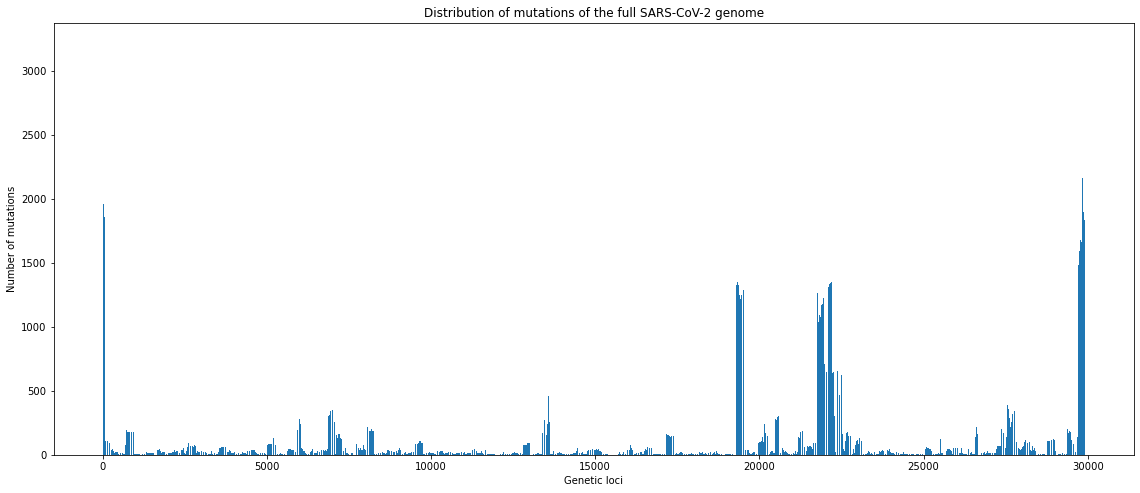

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 6))
ax = fig.add_axes([0,0,1,1])
number_genetic_loci = range(29904)
ax.bar(number_genetic_loci,number_mutations)
plt.title('Distribution of mutations of the full SARS-CoV-2 genome')
plt.xlabel('Genetic loci')
plt.ylabel('Number of mutations')
plt.savefig('mutatedGeneticLoci.png', bbox_inches = 'tight')
plt.show()

In [ ]:
# TODO: verschiedene Bereiche des Coronavirus verschieden einfärben?

In [ ]:
reference_genome = df_dataset["parent"][0]

for m in re.finditer('ATG', reference_genome):
         print('AUG found', m.start(), m.end())

# Dataset insights: Preprocessed dataset